In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("data2.csv")
data.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,familyMembers
0,0,0,3,male,22.0,1,0,7.2500,S,Mrs,1
1,1,1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,2,1,3,female,26.0,0,0,7.9250,S,Miss,0
3,3,1,1,female,35.0,1,0,53.1000,S,Mrs,1
4,4,0,3,male,35.0,0,0,8.0500,S,Mrs,0


In [3]:
data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
data.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,familyMembers
0,0,3,1,22.0,1,0,7.2500,S,Mrs,1
1,1,1,0,38.0,1,0,71.2833,C,Mrs,1
2,1,3,0,26.0,0,0,7.9250,S,Miss,0
3,1,1,0,35.0,1,0,53.1000,S,Mrs,1
4,0,3,1,35.0,0,0,8.0500,S,Mrs,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [6]:
x=data.drop(["Survived","Embarked","title"], axis=1)
y= data["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
tree_model = tree.DecisionTreeClassifier( )  
tree_model.fit(x_train, y_train)
y_pred=tree_model.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7877094972067039


In [7]:
import graphviz

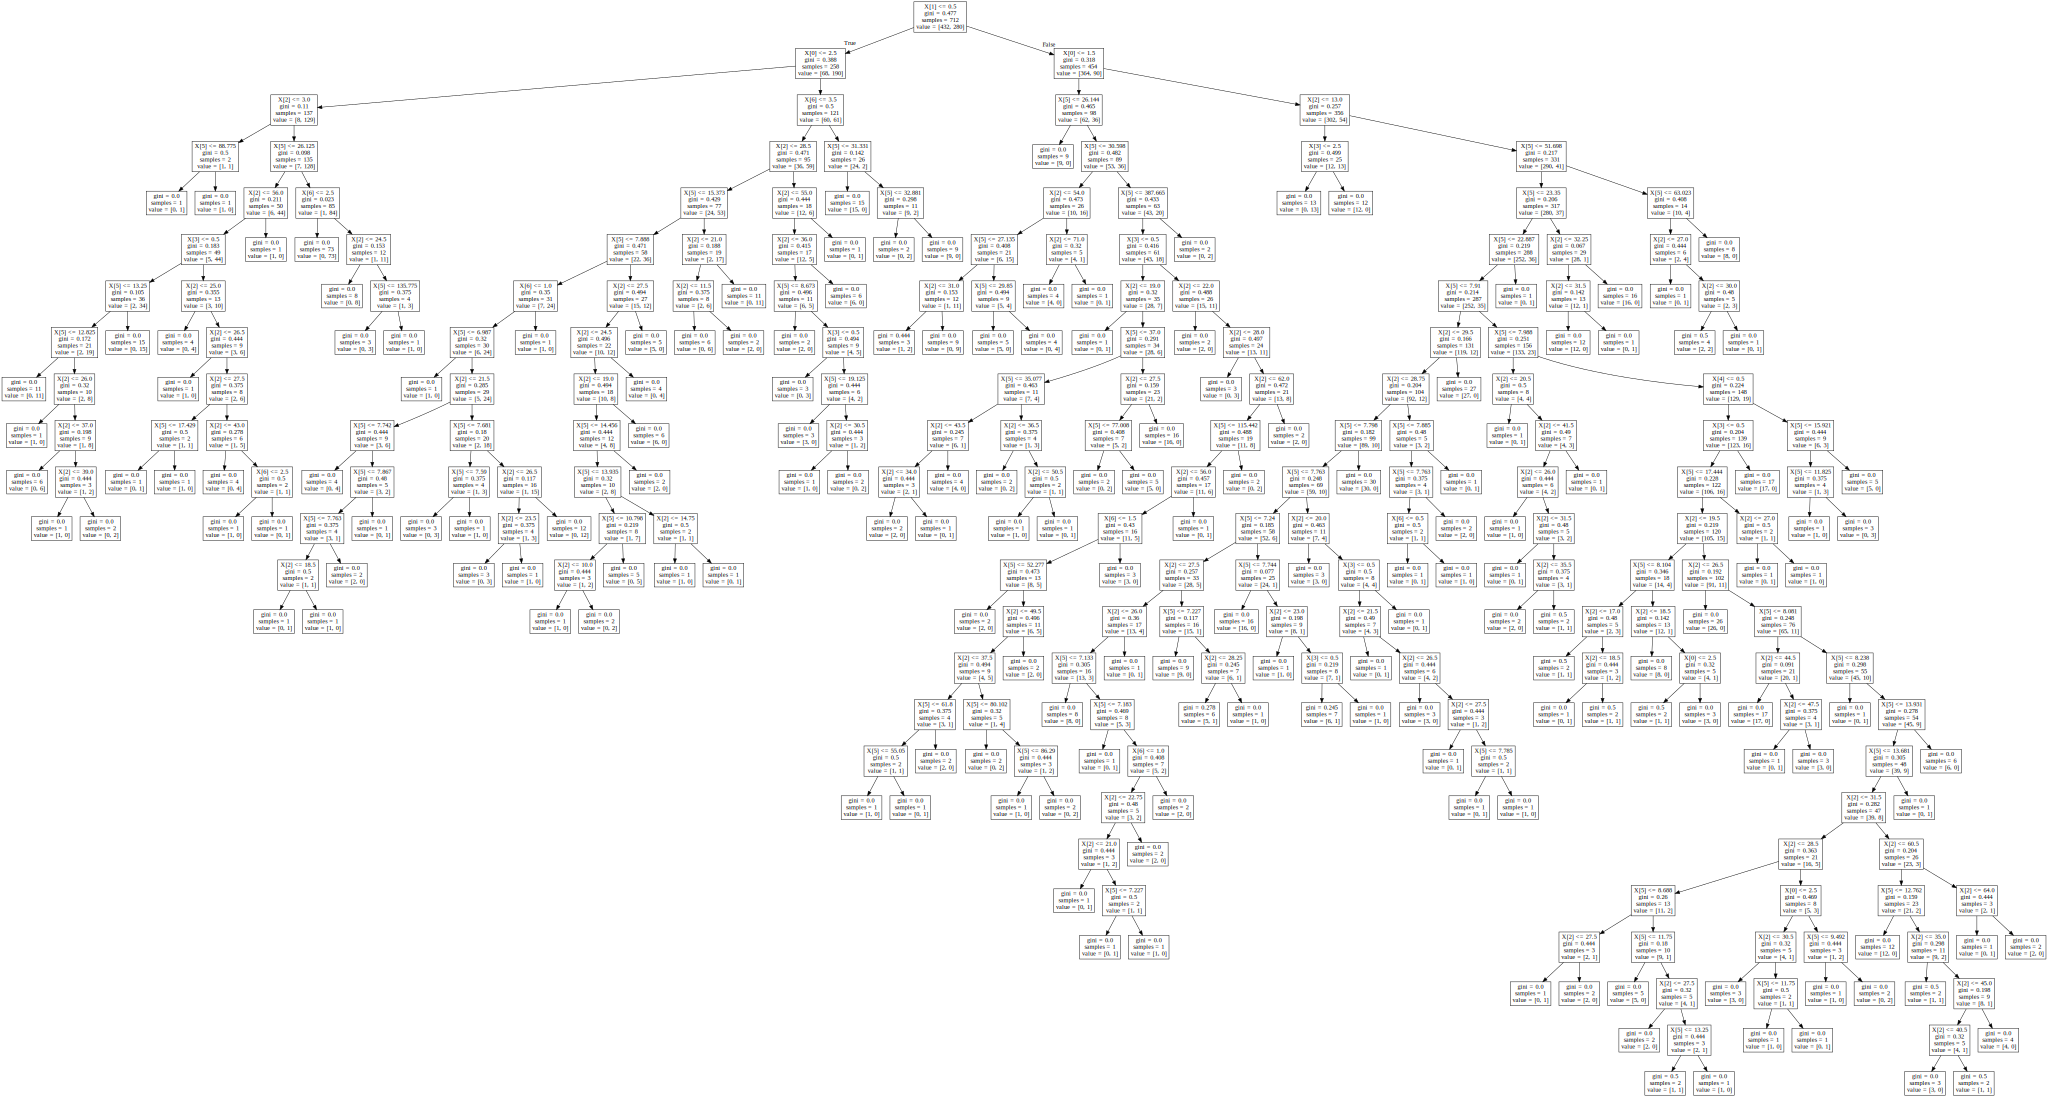

In [8]:
dot_data=tree.export_graphviz(tree_model,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

In [9]:
tree_model2 = tree.DecisionTreeClassifier( splitter="random",criterion="entropy")  
tree_model2.fit(x_train, y_train)
y_pred=tree_model2.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7932960893854749


### random forest

In [10]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Accuracy with 100 estimators:", metrics.accuracy_score(y_test, y_pred))

Accuracy with 100 estimators: 0.8268156424581006


In [11]:
clf2=RandomForestClassifier(n_estimators=50)
clf2.fit(x_train, y_train)
y_pred=clf2.predict(x_test)
print("Accuracy with 50 estimators:", metrics.accuracy_score(y_test, y_pred))

Accuracy with 50 estimators: 0.7932960893854749
